# Classification results

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import evaluate
import merge
import load

In [2]:
class_predictions = merge.merged_predictions(keep_columns=['articleID', 'productGroup', 'customerID', 'voucherID'])
class_train = load.orders_train()

## To what extent do the predictions differ?

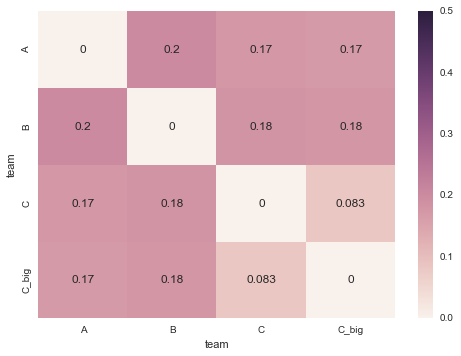

In [3]:
result_differences = evaluate.distinct_predictions(class_predictions)
ax = sns.heatmap(result_differences, vmin=0, vmax=0.5, annot=True)

## How do the differences distribute on the splits?

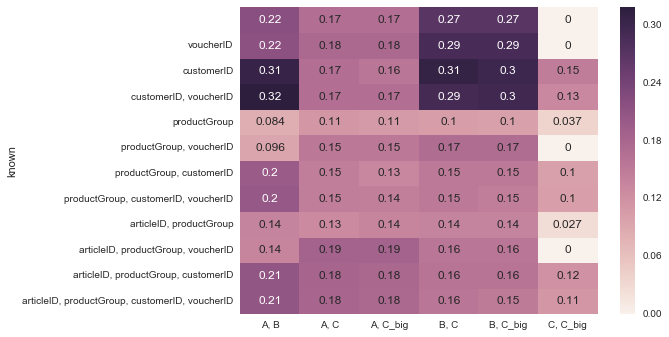

In [4]:
test_split_differences = evaluate.distinct_split_predictions(class_train, class_predictions)
ax = sns.heatmap(test_split_differences, annot=True)

## How big are the splits?

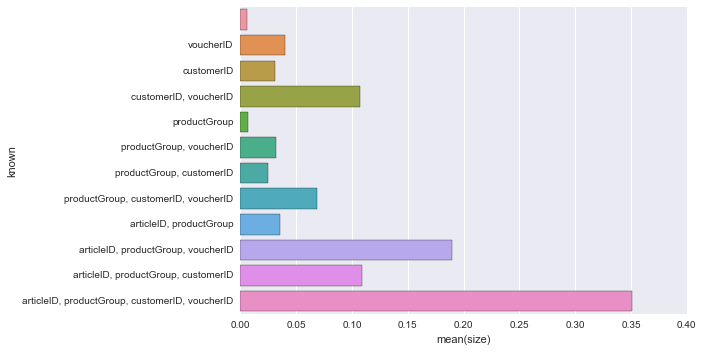

In [5]:
target_split_sizes = evaluate.split_sizes(class_train, class_predictions['original'])
ax = sns.barplot(x='size', y=target_split_sizes.index, data=target_split_sizes)

## How confident are the classifieres when they disagree?

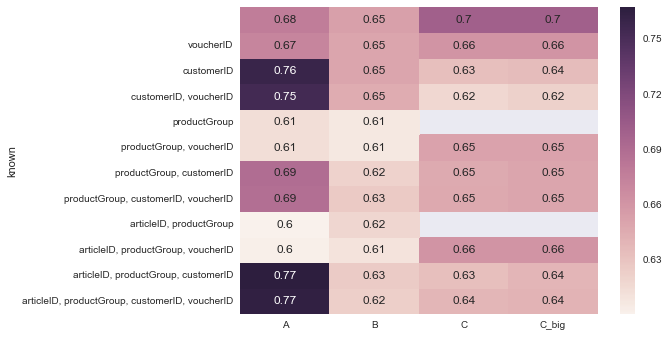

In [6]:
test_split_confidences = evaluate.split_mean_confidences(class_train, class_predictions)
ax = sns.heatmap(test_split_confidences, annot=True)

## How are the classifier confidences distributed?

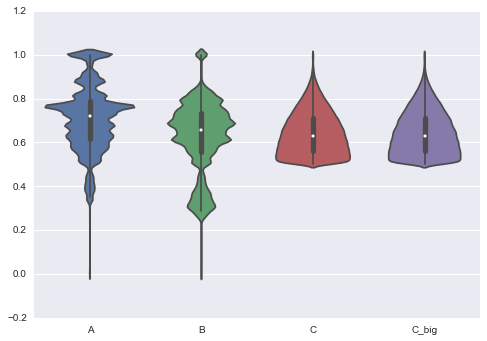

In [7]:
ax = sns.violinplot(data=class_predictions['confidence'])